# Skin Cancer Prediction

# Content

# 1. Importing all necessary libraries

In [1]:
#Import the necessary libraries first

import tensorflow as tf
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras import backend as K
import shutil
import glob
import re

Using TensorFlow backend.


# 2. Loading and Preprocessing the data

In [2]:
data = 'brain_tumor_dataset'
No_brain_tumor = 'no'
Yes_brain_tumor = 'yes'

In [3]:
dirlist=[No_brain_tumor, Yes_brain_tumor]
classes=['No', 'Yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):


    filelist=os.listdir(i)
    print(filelist)
    print('\n')
# os.listdir --> returns a list containing the names of the entries in the directory given by path.
    for f in filelist:
        filepath=os.path.join (i,f)
# os.path.join('brain_tumor_dataset/no/','1 no.jpeg;)
# brain_tumor_dataset/no/1 no.jpeg
        filepaths.append(filepath)
# store the path into empty list called filepaths
        labels.append(j)
    

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg', '14 no.jpg', '15 no.jpg', '17 no.jpg', '18 no.jpg', '19 no.jpg', '2 no.jpeg', '20 no.jpg', '21 no.jpg', '22 no.jpg', '23 no.jpg', '24 no.jpg', '25 no.jpg', '26 no.jpg', '27 no.jpg', '28 no.jpg', '29 no.jpg', '3 no.jpg', '30 no.jpg', '31 no.jpg', '32 no.jpg', '33 no.jpg', '34 no.jpg', '35 no.jpg', '36 no.jpg', '37 no.jpg', '38 no.jpg', '39 no.jpg', '4 no.jpg', '40 no.jpg', '41 no.jpg', '42 no.jpg', '43 no.jpg', '44no.jpg', '45 no.jpg', '46 no.jpg', '47 no.jpg', '48 no.jpeg', '49 no.jpg', '5 no.jpg', '50 no.jpg', '6 no.jpg', '7 no.jpg', '8 no.jpg', '9 no.jpg', 'N1.JPG', 'N11.jpg', 'N15.jpg', 'N16.jpg', 'N17.jpg', 'N19.JPG', 'N2.JPG', 'N20.JPG', 'N21.jpg', 'N22.JPG', 'N26.JPG', 'N3.jpg', 'N5.jpg', 'N6.jpg', 'no 1.jpg', 'no 10.jpg', 'no 100.jpg', 'no 2.jpg', 'no 3.jpg', 'no 4.jpg', 'no 5.jpeg', 'no 6.jpg', 'no 7.jpeg', 'no 8.jpg', 'no 89.jpg', 'no 9.png', 'no 90.jpg', 'no 91.jpeg', 'no 92.jpg', 'no 923.jpg', 'no 94.jpg', 'no

In [4]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)


In [5]:
df['labels']=pd.get_dummies(df['labels'])

# 3. Data Visualization

# 3.1 Visualize the image of brain tumour

<Figure size 288x288 with 0 Axes>

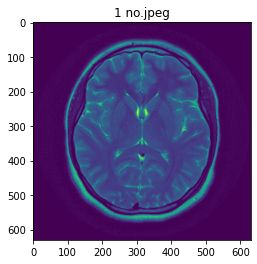

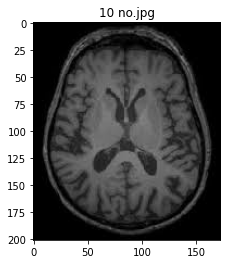

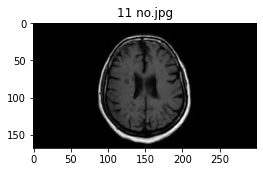

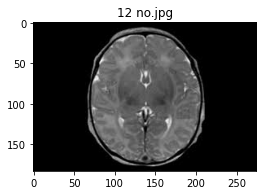

In [7]:
plt.figure(figsize=(4,4))
for i in range(0,4):
    fig, ax = plt.subplots(figsize=(4,4))
    img = mpimg.imread(df['filepaths'][i])
    img_name = re.sub(r'^\D+','',df['filepaths'][i])
    ax.imshow(img)
    ax.set_title(img_name)

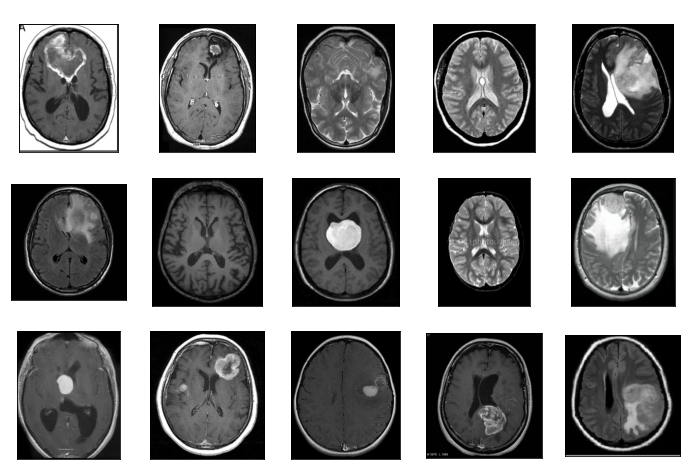

In [8]:
#visualize brain tumor images
import cv2
plt.figure(figsize=(12,8))
for i in range(15):
    random = np.random.randint(1,len(df))
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
    plt.title(df.loc[random, "labels"], size = 15, color = "white") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

Since each image has different size, we need to resize them into same size

In [9]:
from PIL import Image
widths = []
heights = []
for idx, row in df.iterrows():
    path = row['filepaths']
    im = Image.open(path)
    width, height = im.size
    widths.append(width)
    heights.append(height)
avg_width = int(sum(widths) / len(widths))
avg_height = int(sum(heights) / len(heights))
print(avg_width, avg_height)

354 386


The average width is 354 and the average height is 386.
Making the width and height equal makes it simpler to do transformations later. So we’ll resize images to 300x300.

In [6]:
from keras.preprocessing.image import load_img

# Image Resize Function
def load_resize_color_image(path):
    # load image and resize to 300x300
    image = load_img(path,target_size=(300,300))
    return image


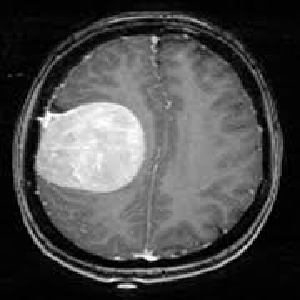

In [9]:
load_img('Y1.jpg',target_size=(300,300))

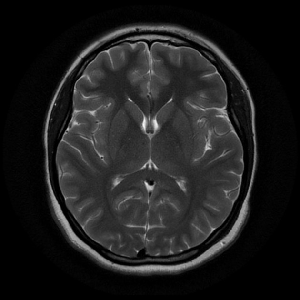

In [10]:
load_img('1 no.jpeg',target_size=(300,300))

In [11]:
image_list =[]
cancer_list =[]
from keras.preprocessing.image import img_to_array
for idx, row in df.iterrows():
    path = row['filepaths']
    cancer = row['labels']
#   print(path)
#   print(cancer)
# brain_tumor_dataset/no/1 no.jpeg
# No
# brain_tumor_dataset/no/10 no.jpg
# No
    image = load_resize_color_image(path)
    # turn image to array
    image_array = img_to_array(image)   
    image_list.append(image_array)
    cancer_list.append(cancer)

In [12]:
print(image_list[0:5])

[array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32), array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [

In [13]:
print(cancer_list[0:5])

[1, 1, 1, 1, 1]


# 4. Shuffling the data

In [14]:
from sklearn.utils import shuffle
image_list, cancer_list = shuffle(image_list, cancer_list)

In [15]:
X_data = np.array(image_list)
y_data = np.array(cancer_list)

<AxesSubplot:ylabel='count'>

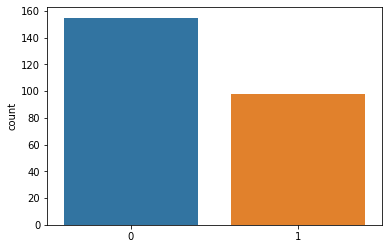

In [16]:
import seaborn as sns
sns.countplot(y_data)

In [17]:
print(X_data.shape)
print(y_data.shape)

(253, 300, 300, 3)
(253,)


# 5. Splitting the data into training and testing dataset

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=0)

In [19]:
print(X_train.shape)
print(y_train.shape)

(202, 300, 300, 3)
(202,)


In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
print(X_test.shape)
print(y_test.shape)

(51, 300, 300, 3)
(51,)


# 6. Model Building

# 6.1 CNN 3*3 

In [24]:
epochs = 10
batch_size = 10
input_shape = (300,300,3)

In [25]:
model = Sequential()

# layer 1
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#layer 3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# CNN structure
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

In [27]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])



In [28]:
#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/10
202/202 [==============================] - 76s 375ms/step - loss: 0.6728 - acc: 0.6238 - val_loss: 0.6642 - val_acc: 0.5294
Epoch 2/10
202/202 [==============================] - 50s 249ms/step - loss: 0.5468 - acc: 0.7525 - val_loss: 0.6454 - val_acc: 0.7255
Epoch 3/10
202/202 [==============================] - 52s 257ms/step - loss: 0.5166 - acc: 0.8069 - val_loss: 0.6524 - val_acc: 0.7647
Epoch 4/10
202/202 [==============================] - 52s 257ms/step - loss: 0.4269 - acc: 0.8366 - val_loss: 0.5428 - val_acc: 0.7843
Epoch 5/10
202/202 [==============================] - 51s 251ms/step - loss: 0.2942 - acc: 0.8812 - val_loss: 0.6525 - val_acc: 0.7451
Epoch 6/10
202/202 [==============================] - 52s 259ms/step - loss: 0.2397 - acc: 0.9109 - val_loss: 0.5105 - val_acc: 0.7647
Epoch 7/10
202/202 [==============================] - 51s 255ms/step - loss: 0.2043 - acc: 0.9257 - val_loss: 0.7581 - val_acc: 0.7255
Epoch 8/10

In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 1.7232274705288457
Test accuracy: 0.8235294222831726


# 6.2 Resnet 50

In [31]:
from keras.applications.resnet50 import ResNet50 
from keras import Model, layers
from keras.optimizers import SGD

conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False
    
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(1, activation='softmax')(x)
model = Model(conv_base.input, predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), 
              loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\neha srivastav\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [32]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(X_train,
         y_train,
         batch_size=10,
         epochs=10,
         validation_data=(X_test, y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/10
202/202 [==============================] - 180s 892ms/step - loss: 9.8679 - accuracy: 0.3564 - val_loss: 7.4751 - val_accuracy: 0.5098
Epoch 2/10
202/202 [==============================] - 175s 867ms/step - loss: 9.8679 - accuracy: 0.3564 - val_loss: 7.4751 - val_accuracy: 0.5098
Epoch 3/10
202/202 [==============================] - 166s 824ms/step - loss: 9.8679 - accuracy: 0.3564 - val_loss: 7.4751 - val_accuracy: 0.5098
Epoch 4/10
202/202 [==============================] - 164s 813ms/step - loss: 9.8679 - accuracy: 0.3564 - val_loss: 7.4751 - val_accuracy: 0.5098
Epoch 5/10
202/202 [==============================] - 689s 3s/step - loss: 9.8679 - accuracy: 0.3564 - val_loss: 7.4751 - val_accuracy: 0.5098
Epoch 6/10
202/202 [==============================] - 180s 889ms/step - loss: 9.8679 - accuracy: 0.3564 - val_loss: 7.4751 - val_accuracy: 0.5098
Epoch 7/10
202/202 [==============================] - 176s 870ms/step - loss: 9.86

In [34]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 7.475116841933307
Test accuracy: 0.5098039507865906


# 6.3 CNN 5*5

In [26]:
model_2= Sequential()
input_shape = (300,300,3)
epochs = 10
batch_size = 10

#layer 1
model_2.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=input_shape))


In [27]:
model_2.add(Conv2D(32,(5,5),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
#layer 3
model_2.add(Conv2D(16,(5,5),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1,activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 296, 296, 32)      2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 292, 292, 32)      25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 146, 146, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 142, 142, 16)      12816     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 71, 71, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 71, 71, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80656)            

In [29]:
#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model_2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/10
202/202 [==============================] - 120s 595ms/step - loss: 0.5837 - accuracy: 0.7376 - val_loss: 0.8597 - val_accuracy: 0.6275
Epoch 2/10
202/202 [==============================] - 119s 589ms/step - loss: 0.4828 - accuracy: 0.8020 - val_loss: 0.7139 - val_accuracy: 0.6275
Epoch 3/10
202/202 [==============================] - 126s 625ms/step - loss: 0.4406 - accuracy: 0.8168 - val_loss: 0.7032 - val_accuracy: 0.7059
Epoch 4/10
202/202 [==============================] - 130s 643ms/step - loss: 0.5441 - accuracy: 0.7624 - val_loss: 0.6922 - val_accuracy: 0.6471
Epoch 5/10
202/202 [==============================] - 122s 606ms/step - loss: 0.3488 - accuracy: 0.8663 - val_loss: 1.7008 - val_accuracy: 0.7255
Epoch 6/10
202/202 [==============================] - 125s 617ms/step - loss: 0.3386 - accuracy: 0.8911 - val_loss: 0.9390 - val_accuracy: 0.7059
Epoch 7/10
202/202 [==============================] - 122s 606ms/step - loss: 0

In [30]:
score = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.612540792016422
Test accuracy: 0.7647058963775635


# 6.4 VGG16

In [35]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)


In [36]:
from tensorflow.keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=95,
    restore_best_weights=True
)

In [28]:
from tensorflow.keras.applications import vgg16
def create_vgg16():  
  model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, 
                      input_shape=(300,300,3), 
                      pooling="max", classes=2)

  return model

vgg16_model = create_vgg16()  
vgg16_model.compile(loss='binary_crossentropy', optimizer='adam',
                    metrics=['acc'])  


vgg16 = vgg16_model.fit(x=X_train,
                        y=y_train, batch_size=32,
                        epochs=100, verbose=1,
                        validation_data=(X_test, y_test), 
                        shuffle=True,
                        callbacks=[learning_rate_reduction,
                                                custom_early_stopping])  

Epoch 1/100
83/83 [==============================] - 23s 254ms/step - loss: 0.6939 - acc: 0.5238 - val_loss: 0.6894 - val_acc: 0.5455
Epoch 2/100
83/83 [==============================] - 19s 231ms/step - loss: 0.6933 - acc: 0.5327 - val_loss: 0.6896 - val_acc: 0.5455
Epoch 3/100
83/83 [==============================] - 19s 233ms/step - loss: 0.6870 - acc: 0.5666 - val_loss: 0.6895 - val_acc: 0.5455
Epoch 4/100
83/83 [==============================] - 19s 232ms/step - loss: 0.6890 - acc: 0.5509 - val_loss: 0.6891 - val_acc: 0.5455
Epoch 5/100
83/83 [==============================] - 19s 231ms/step - loss: 0.6863 - acc: 0.5643 - val_loss: 0.6894 - val_acc: 0.5455
Epoch 6/100
83/83 [==============================] - 19s 232ms/step - loss: 0.6901 - acc: 0.5408 - val_loss: 0.6890 - val_acc: 0.5455

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/100
83/83 [==============================] - 19s 233ms/step - loss: 0.6898 - acc: 0.5420 - val_loss: 0.6890

In [29]:
score = vgg16_model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

42/42 [==============================] - 2s 41ms/step - loss: 0.6890 - acc: 0.5455
Test loss: 0.6890094876289368
Test accuracy: 0.5454545617103577


# 7. Conclusion

In [33]:
models = pd.DataFrame({"Model":['CNN 3 layer ','CNN 5 Layer','ResNet50','VGG16'],
           "Accuracy":[82.35,76.47,50.98, 54.54]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,CNN 3 layer,82.35
1,CNN 5 Layer,76.47
3,VGG16,54.54
2,ResNet50,50.98


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

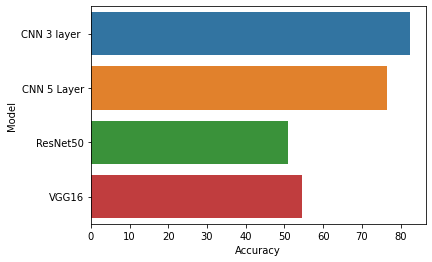

In [34]:
import seaborn as sns
sns.barplot(x= 'Accuracy', y= 'Model', data= models)